# **Plot logged data**

In [10]:
# Standard libraries
import pathlib

# Third-party libraries
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Load the state_dict of the model from the checkpoint
runs_dir = pathlib.Path("../logs/train/runs")
checkpoint = None
# checkpoint = "2024-05-14_05-04-08*"
# checkpoint = "2024-05-18_12-36-39*"

if checkpoint is None:
    # Get the last checkpoint
    logs_dir = sorted(runs_dir.iterdir())[-1]
else:
    # Get the checkpoint with the specified name
    logs_dir = runs_dir / checkpoint

print(f"Loading checkpoint from {logs_dir}")

Loading checkpoint from ../logs/train/runs/2024-06-04_05-05-27


In [12]:
# Load the csv log file
csv_path = logs_dir / "csv/version_0/metrics.csv"
try:
    csv_file = pd.read_csv(csv_path)
except FileNotFoundError:
    print(f"File '{csv_path}' not found.\nIt may not have been created yet. Please retry later.")

In [13]:
def epochs_and_metric(
    dataframe: pd.DataFrame,
    metric_name: str,
) -> tuple[pd.Series, pd.Series]:
    """Extract metric values and the corresponding epochs from a dataframe.

    Args:
        dataframe (pd.DataFrame): The dataframe containing the metric values and
            epochs.
        metric_name (str): The name of the metric to extract.

    Returns:
        tuple[pd.Series, pd.Series]: The epochs and the metric values.
    """
    if metric_name not in dataframe.columns:
        raise ValueError(f"Metric '{metric_name}' not found in the dataframe.")
    
    # Get the metric values
    metric = dataframe[metric_name].dropna()
    
    # Retrieve the epochs by index
    indexes = metric.index
    epochs = dataframe["epoch"].iloc[indexes].astype(int)
    
    return epochs, metric

In [14]:
epochs, metric = epochs_and_metric(csv_file, "train/loss")
idx = metric < 1
epochs = epochs[idx]
metric = metric[idx]

epochs_val, metric_val = epochs_and_metric(csv_file, "val/loss")
idx = metric_val < 1
epochs_val = epochs_val[idx]
metric_val = metric_val[idx]

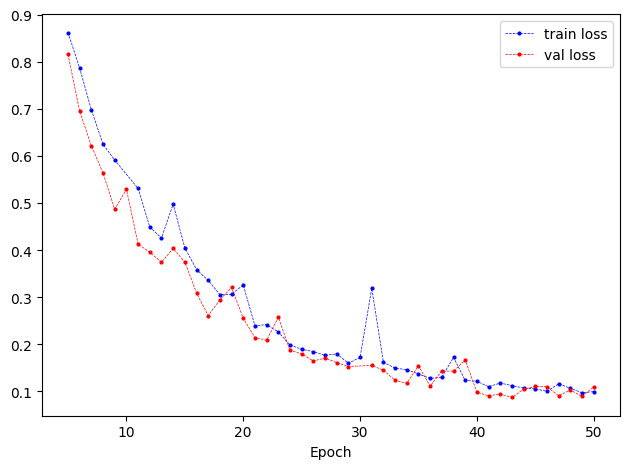

In [15]:
# Plot losses
plt.plot(
    # *epochs_and_metric(csv_file, "train/loss"),
    epochs, metric,
    "bo--", markersize=2, linewidth=0.5,
    label="train loss",
)
plt.plot(
    # *epochs_and_metric(csv_file, "val/loss"),
    epochs_val, metric_val,
    "ro--", markersize=2, linewidth=0.5,
    label="val loss",
)
plt.xlabel("Epoch")
plt.legend()
plt.tight_layout()
plt.show()

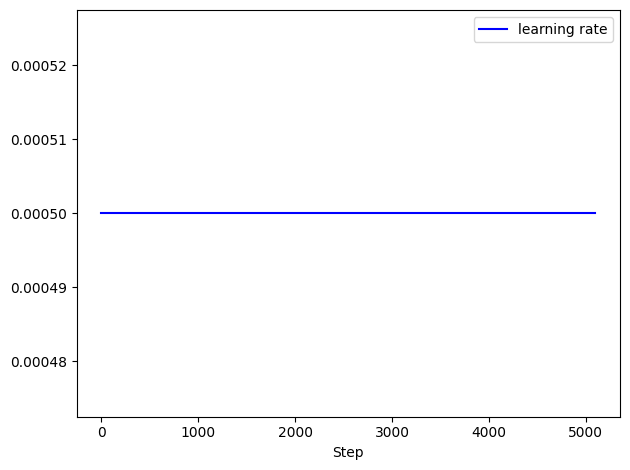

In [16]:
# Plot learning rates
lr = csv_file["lr-Adam"].dropna()
steps = csv_file["step"].iloc[lr.index].astype(int)
plt.plot(steps, lr, "b", label="learning rate")
plt.xlabel("Step")
plt.legend()
plt.tight_layout()
plt.show()